In [2]:
!pip install shap

In [3]:
#1. Import Libraries
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [4]:
#2. Load Data & Trained Model Inputs
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").values.ravel()
y_test  = pd.read_csv("../data/processed/y_test.csv").values.ravel()

In [5]:
#3. Retrain Best Model (Random Forest)
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [7]:
#4. Initialize SHAP Explainer
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [11]:
#5. Global Feature Importance (MOST IMPORTANT)
#step 1: Select the correct SHAP values for churn class
# Handle SHAP output format safely
if isinstance(shap_values, list):
    shap_vals_churn = shap_values[1]          # older SHAP versions
else:
    shap_vals_churn = shap_values[:, :, 1]    # newer SHAP versions


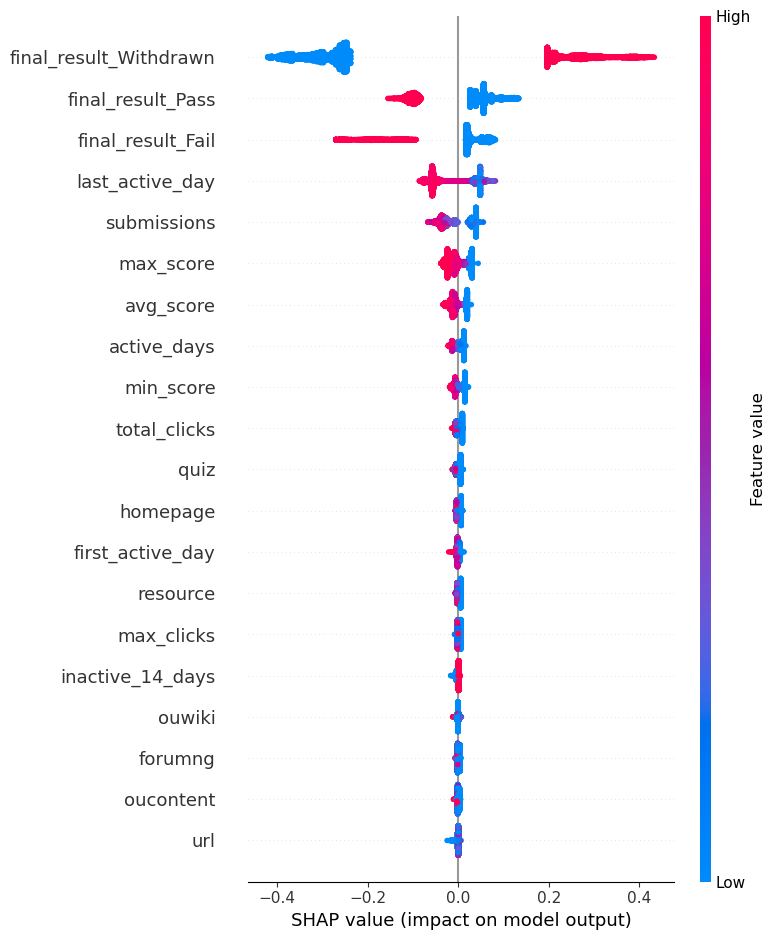

In [12]:
#step 2: Plot Global Feature Importance (DOT Plot)
shap.summary_plot(
    shap_vals_churn,
    X_test,
    plot_type="dot"
)

In [14]:
#6. Bar Plot – Average Impact
# Always do this ONCE after computing shap_values
if isinstance(shap_values, list):
    shap_vals_churn = shap_values[1]          # older SHAP
else:
    shap_vals_churn = shap_values[:, :, 1]    # newer SHAP

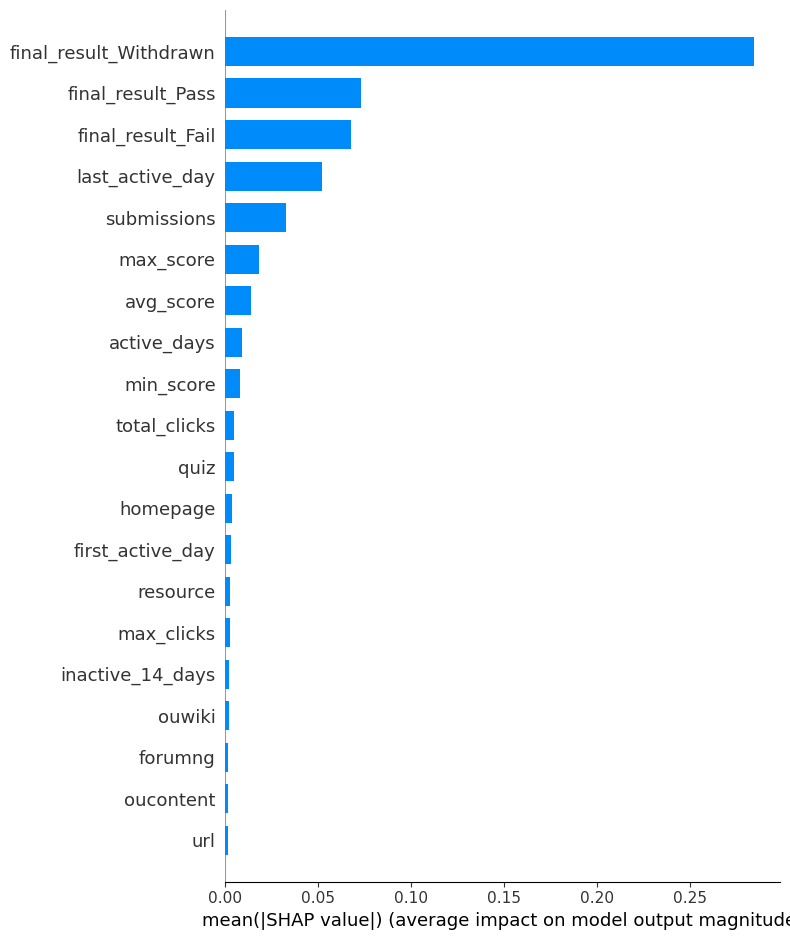

In [15]:
#Step 2: Correct Bar Plot (FIXED)
shap.summary_plot(
    shap_vals_churn,
    X_test,
    plot_type="bar"
)

In [16]:
#7. Individual Student Explanation (VERY IMPRESSIVE)
#7.1 Pick a High-Risk Student
high_risk_index = np.argmax(rf.predict_proba(X_test)[:,1])
high_risk_index

np.int64(3)

In [21]:
#7.2 SHAP Force Plot
# Safe extraction for churn class
if isinstance(shap_values, list):
    shap_vals_churn = shap_values[1]
    expected_value = explainer.expected_value[1]
else:
    shap_vals_churn = shap_values[:, :, 1]
    expected_value = explainer.expected_value[1]
high_risk_index = np.argmax(rf.predict_proba(X_test)[:, 1])
shap.initjs()

In [22]:
shap.force_plot(
    expected_value,
    shap_vals_churn[high_risk_index],
    X_test.iloc[high_risk_index]
)

8. Business Interpretation (WRITE THIS AS MARKDOWN)

✍️ Add a Markdown cell:

Key Explainability Insights:

Extended inactivity significantly increases dropout risk

Consistent engagement reduces churn probability

Missed assessments act as strong early-warning signals

Academic performance complements behavioral indicators

9. How This Helps the Business (CRITICAL)

✍️ Markdown cell:

Actionable Interventions:

Auto-alert instructors when inactivity exceeds 14 days

Trigger mentoring for students missing assessments

Recommend engaging content for low-activity users

Prioritize high-risk students for early support

🔥 This connects AI → real decisions

In [ ]:
#10. Save SHAP Feature Importance (Optional)
type(shap_values)
np.array(shap_values).shape
# Handle different SHAP output formats safely
if isinstance(shap_values, list):
    # Binary classification (older SHAP versions)
    shap_vals_churn = shap_values[1]
else:
    # Newer SHAP versions (3D array)
    shap_vals_churn = shap_values[:, :, 1]
shap_importance = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": np.abs(shap_vals_churn).mean(axis=0)
}).sort_values(by="mean_abs_shap", ascending=False)

In [13]:
shap_importance.to_csv(
    "../data/processed/shap_feature_importance.csv",
    index=False
)

In [14]:
shap_importance.head(10)

,feature,mean_abs_shap
40,final_result_Withdrawn,0.283978
39,final_result_Pass,0.072681
38,final_result_Fail,0.067441
5,last_active_day,0.051813
11,submissions,0.032312
8,max_score,0.017829
7,avg_score,0.013500
3,active_days,0.008662
9,min_score,0.007755
0,total_clicks,0.004830


✅ END OF NOTEBOOK 06
What You Have Achieved:

✔ Built explainable ML
✔ Identified root causes of churn
✔ Explained individual predictions
✔ Delivered business-ready insigh